# Inlämningsuppgift Prediktiv analys 
### Yuka Tatsumi

<!-- ## Table of contents -->
<!-- * [Inspect and prepare the data](#inspect) -->

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn. preprocessing import RobustScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline



In [220]:
df=pd.read_csv('prediktiv_data.csv', index_col="id")

In [221]:
pd.options.display.max_columns=None

## Inspect and prepare the data<a name="inspect"></a> 

In [222]:
df.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,1960,1,NaN,NaN,red,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,1961,1,NaN,dog,red,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,1958,1,NaN,NaN,red,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,1968,2,NaN,NaN,red,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,1997,2,NaN,dog,red,1,bad,bad,3,1,3,2010,1,701,1998


According to below, there are 5 non-numeric column.

In [223]:
df.dtypes

target           int64
feature01      float64
feature02      float64
feature03        int64
feature04      float64
feature05        int64
feature06        int64
feature07        int64
feature08        int64
feature09        int64
feature10        int64
feature10.1      int64
feature11       object
feature12       object
feature13       object
feature14        int64
feature15       object
feature16       object
feature17        int64
feature18        int64
feature19        int64
feature20        int64
feature21        int64
feature22        int64
feature23        int64
dtype: object

In [224]:
df.shape

(2930, 25)

In [225]:
df.describe()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23
count,2930.000000,2929.000000,2929.000000,2930.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,1.766815,472.819734,2.243345,1051.614544,1159.557679,6.443003,1499.690444,6.094881,5.563140,1971.356314,1.566553,0.599317,2.854266,1.044369,6.216041,2007.790444,0.379522,335.455973,1984.266553
std,79886.692357,0.760566,215.046549,35.597181,440.615067,391.890885,1.572964,505.508887,1.411026,1.111537,30.245361,0.552941,0.647921,0.827731,0.214076,2.714492,1.316613,0.502629,428.395715,20.860286
min,12789.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,334.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,1950.000000
25%,129500.000000,1.000000,320.000000,0.000000,793.000000,876.250000,5.000000,1126.000000,5.000000,5.000000,1954.000000,1.000000,0.000000,2.000000,1.000000,4.000000,2007.000000,0.000000,0.000000,1965.000000
50%,160000.000000,2.000000,480.000000,0.000000,990.000000,1084.000000,6.000000,1442.000000,6.000000,5.000000,1973.000000,2.000000,1.000000,3.000000,1.000000,6.000000,2008.000000,0.000000,0.000000,1993.000000
75%,213500.000000,2.000000,576.000000,0.000000,1302.000000,1384.000000,7.000000,1742.750000,7.000000,6.000000,2001.000000,2.000000,1.000000,3.000000,1.000000,8.000000,2009.000000,1.000000,703.750000,2004.000000
max,755000.000000,5.000000,1488.000000,800.000000,6110.000000,5095.000000,15.000000,5642.000000,10.000000,9.000000,2010.000000,4.000000,4.000000,8.000000,3.000000,12.000000,2010.000000,2.000000,2065.000000,2010.000000


#### Missing values

There are  some columns where more than 50% of values are missing. Those columns should be deleted.

There are some columns where only a few values are missing values.  In this case, rows where the missing values exist should be deleted.
  

In [226]:
df.isnull().sum()

target            0
feature01         1
feature02         1
feature03         0
feature04         1
feature05         0
feature06         0
feature07         0
feature08         0
feature09         0
feature10         0
feature10.1       0
feature11      2732
feature12      2358
feature13         1
feature14         0
feature15      1422
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
dtype: int64

In [227]:
nan_per_col= df.isna().sum()

In [228]:
column_to_drop= nan_per_col[nan_per_col>1000]
column_index_to_drop = column_to_drop.index
df.drop(column_index_to_drop, axis=1, inplace=True)


In [229]:
df.isna().sum()


target         0
feature01      1
feature02      1
feature03      0
feature04      1
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      1
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64

In [230]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

target         0
feature01      0
feature02      0
feature03      0
feature04      0
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      0
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64

#### Non-numeric values
There are two remaining non-numeric columns (feature 13, feature 16), which should be converted to numerical (feature 13: Nominal, feature 16: Ordinal).



In [231]:
df.dtypes

target           int64
feature01      float64
feature02      float64
feature03        int64
feature04      float64
feature05        int64
feature06        int64
feature07        int64
feature08        int64
feature09        int64
feature10        int64
feature10.1      int64
feature13       object
feature14        int64
feature16       object
feature17        int64
feature18        int64
feature19        int64
feature20        int64
feature21        int64
feature22        int64
feature23        int64
dtype: object

Feature 13 is nominal and Feature 16 is ordinal.

In [232]:
df['feature13'].value_counts()

red       2681
blue       187
green       50
yellow       8
pink         1
Name: feature13, dtype: int64

In [233]:
df['feature16'].value_counts()

bad         1493
good        1158
amazing      205
okay          70
horrible       1
Name: feature16, dtype: int64

In [234]:
df['feature16'].unique()

array(['bad', 'good', 'amazing', 'okay', 'horrible'], dtype=object)



### Outliers and Distribution

There are many outliers for target variable and target variable is right skewed.

Even after log transformation, the target variable is little left skewed with outliers.

Therefore, it is good to standardize the data with RobustScaler.


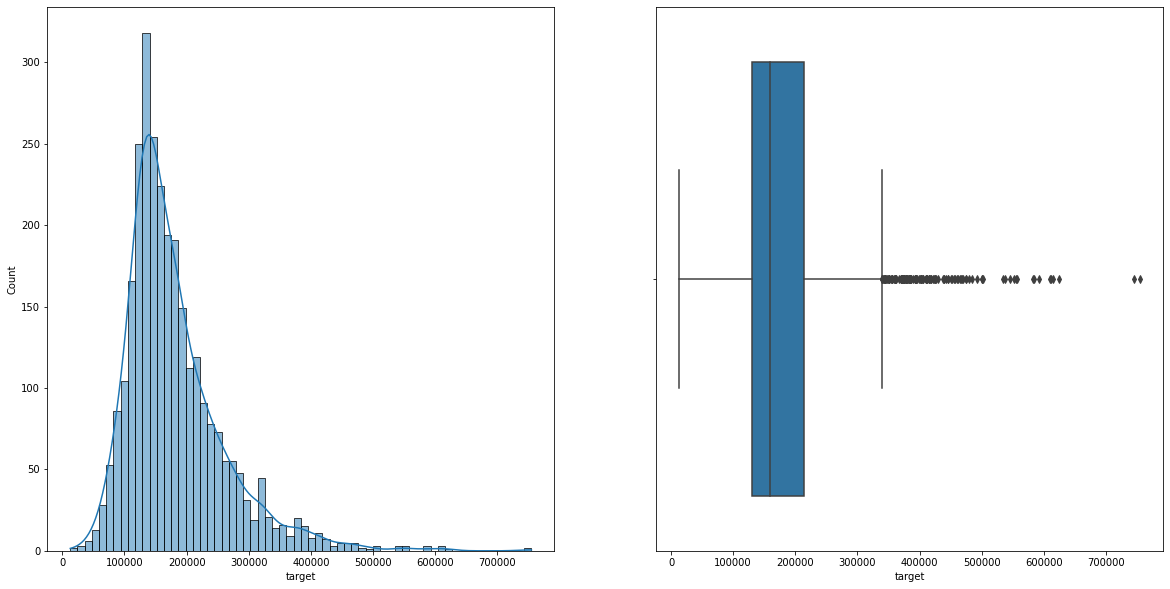

In [235]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.histplot(ax=axes[0], x=df['target'], kde=True);
sns.boxplot(ax=axes[1], x=df['target']);

In [236]:
df['log_target'] = np.log(df['target'])

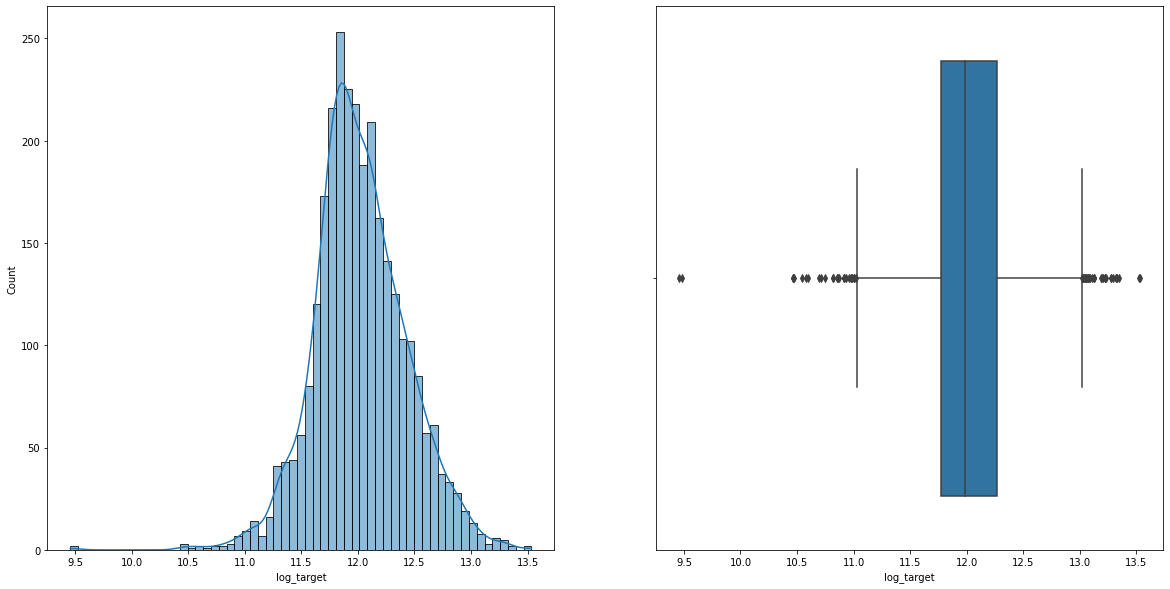

In [237]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.histplot(ax=axes[0], x=df['log_target'], kde=True);
sns.boxplot(ax=axes[1], x=df['log_target']);

In [238]:

df.drop('log_target', axis=1, inplace=True)

#### Assumption for linear models : No Multicollinearity
Feature 01 & Feature 02,  Feature 04 & Feature 05 and feature06 & Feature 07 are higly correlated. (correlation is higher than 0.8)

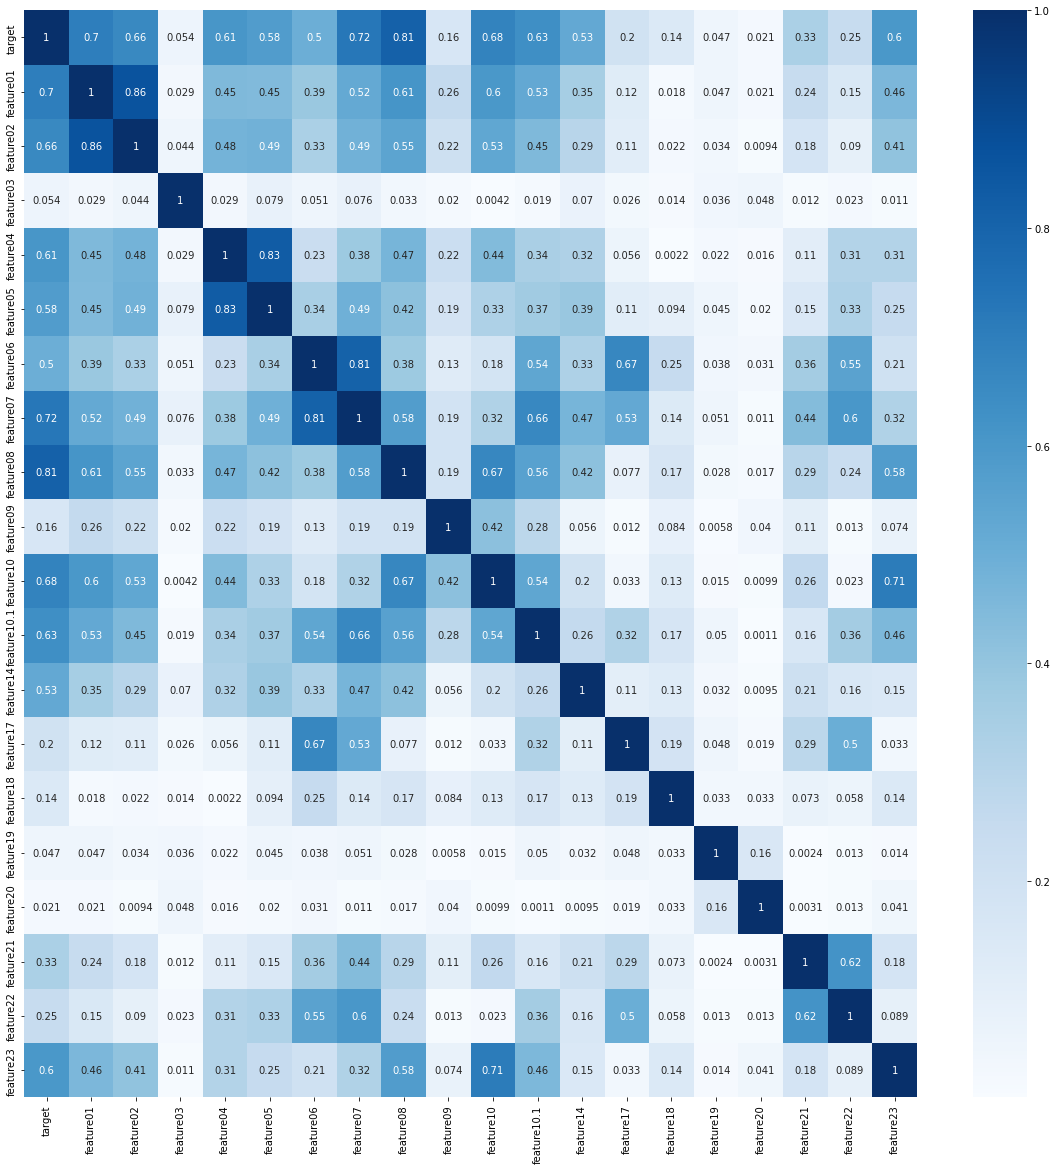

In [239]:

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(abs(df.corr(method='spearman')), annot=True,ax=ax,cmap="Blues");

There are some features with discrete nummer. Feature 10,20,23 seems to be year.  

There are many value 0 in Feature03 and Feature22, which needs to be investigated if possible. 

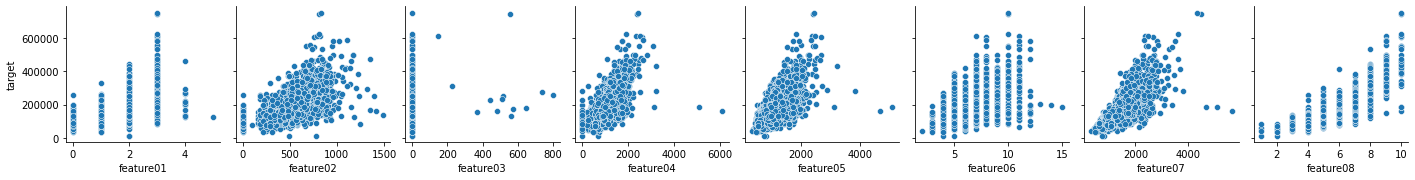

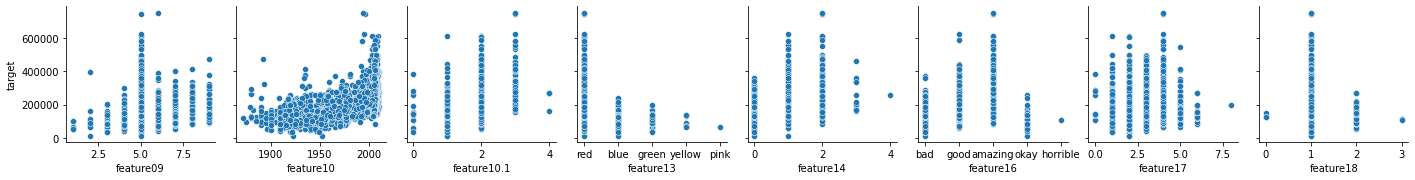

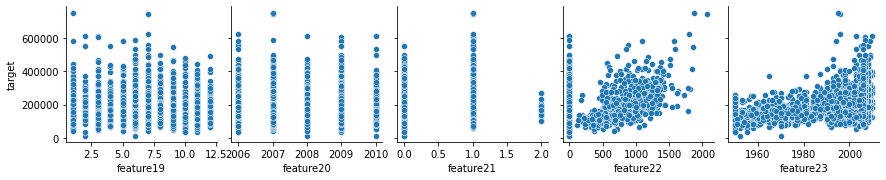

In [240]:

print(sns.pairplot(df, y_vars="target", x_vars=df.columns.values[1:9]))
print(sns.pairplot(df, y_vars="target", x_vars=df.columns.values[9:17]))
print(sns.pairplot(df, y_vars="target", x_vars=df.columns.values[17:]))


####  Encoding : Converting catergorical values to numerical values.

##### Norminal Features

In [241]:
df=pd.concat([df, pd.get_dummies(df['feature13'], prefix='13', drop_first=True)],axis=1)
df.head()
df.drop(['feature13'],axis=1, inplace=True)

In [242]:
df.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,13_green,13_pink,13_red,13_yellow
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,1960,1,2,bad,3,1,5,2010,0,0,1960,0,0,1,0
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,1961,1,0,bad,2,1,6,2010,0,0,1961,0,0,1,0
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,1958,1,0,good,3,1,6,2010,1,0,1958,0,0,1,0
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,1968,2,2,amazing,3,1,4,2010,1,0,1968,0,0,1,0
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,1997,2,1,bad,3,1,3,2010,1,701,1998,0,0,1,0


##### Ordinal Features


In [243]:
# Feature 16  
ordinal16 ={'amazing':5, 'good':4,'okay':3,'bad':2, 'horrible':1}
df['feature16'] = df["feature16"].replace(ordinal16)

<!-- ##### Feature Selection to eliminate multicollinearity -->

### Model Selection 

There are many outliers and some multicollinearity in the dataset. 

Therefore, it is good to use KNN, decision tree model or ensembling method, because they are less sensitive to outliers and do not have strict assumptions as linear regression.

### Getting the train and test sets

In [245]:
def data_split(file):
    target_name='target'
    x=file.drop('target', inplace=False, axis=1)
    y=file[target_name]
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=12)
    scaler=RobustScaler()
    x=scaler.fit_transform(x)
    return x, y, x_train, x_test, y_train, y_test

In [247]:
 x, y, x_train, x_test, y_train, y_test = data_split(df)

#### Creating DataFrame


In [246]:
error_metrics = pd.DataFrame()


### No Feature Selection 
##### Null Model

In [248]:
null = y_train.mean()
error_metrics.loc['Test_RMSE','NULL'] =mean_squared_error(y_pred= np.repeat(y_test.mean(),y_test.size), y_true=y_test, squared=False)
error_metrics.loc['Test_MAE','NULL'] =mean_absolute_error(y_pred= np.repeat(y_test.mean(), y_test.size), y_true=y_test)
error_metrics.loc['Train_RMSE','NULL'] =mean_squared_error(y_pred= np.repeat(y_train.mean(), y_train.size), y_true=y_train, squared=False)
error_metrics.loc['Train_MAE','NULL'] =mean_absolute_error(y_pred= np.repeat(y_train.mean(), y_train.size), y_true=y_train)


<!-- ##### KNN -->


<!-- ##### Bagging -->

In [315]:
def GCV_Model(model,model_name, param_grid):
    """ This is a method that implements Grid Search CV and cross_validate models
                Args:
                    model: model that is used.
                    model_name: the name of the model that is used.
                Returns:
                    gcv: model after grid search cv 
    """
  
    reg_pipeline = Pipeline ([('scaler',RobustScaler()),('regressor', model())])
    gcv= GridSearchCV(reg_pipeline, param_grid, scoring='neg_root_mean_squared_error',refit=True, cv=5)

    gcv.fit(x_train, y_train)
    print(f"Grid Search CV Best Parameters:  {gcv.best_params_}")
    print(f"Grid Search CV Best Scores:  {gcv.best_score_}")
    error_metrics.loc['Train_RMSE',model_name] = mean_squared_error(y_pred=gcv.predict(x_train), y_true=y_train, squared=False)
    error_metrics.loc['Test_RMSE',model_name] = mean_squared_error(y_pred=gcv.predict(x_test), y_true=y_test, squared=False)
    error_metrics.loc['Train_MAE',model_name] = mean_absolute_error(y_pred=gcv.predict(x_train), y_true=y_train) 
    error_metrics.loc['Test_MAE',model_name] =mean_absolute_error(y_pred=gcv.predict(x_test), y_true=y_test) 
    
    cv_results=cross_validate(estimator=gcv, X=x, y=y,scoring=['neg_root_mean_squared_error', 'r2'],cv=5, n_jobs=-1, return_train_score=True)
    error_metrics.loc['Cross Validate',model_name] = -(cv_results['test_neg_root_mean_squared_error'].mean())
    print(f"Test RMSEs:  {-(cv_results['test_neg_root_mean_squared_error'])}")
    print(f"Average Test RMSE:  {-(cv_results['test_neg_root_mean_squared_error'].mean())}")
    print(f"Average Test_R2:  {cv_results['test_r2'].mean()}")
    return gcv

##### KNeighborRegressor

In [316]:
knn_param_grid = {'regressor__n_neighbors':np.arange(10,100,20), 'regressor__weights':['uniform', 'distance'],'regressor__n_jobs':[-1]}
knn_gcv=GCV_Model(KNeighborsRegressor,'KNN',knn_param_grid)



Grid Search CV Best Parameters:  {'regressor__n_jobs': -1, 'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'}
Grid Search CV Best Scores:  -32292.923047575827
Test RMSEs:  [32415.89327041 24673.98267428 30170.88898039 41869.89167896
 28095.17178516]
Average Test RMSE:  31445.1656778385
Average Test_R2:  0.8408239667885098


##### RandomForestRegressor

In [253]:
rf_param_grid = {'regressor__n_estimators':np.arange(10,250, 50), 'regressor__max_depth':np.arange(10,200,50),'regressor__n_jobs':[-1],'regressor__max_features': ['auto','sqrt']}
rf_gcv=GCV_Model(RandomForestRegressor,'RandomForest', rf_param_grid)

Grid Search CV Best Parameters:  {'regressor__max_depth': 160, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 210, 'regressor__n_jobs': -1}
Grid Search CV Best Scores:  -26931.75143854642
Test RMSEs:  [27990.7860776  23066.12165661 26388.99261898 34967.04703196
 24957.45954765]
Average Test RMSE:  27474.081386560232
Average Test_R2:  0.8792509108447945


##### Boosting (Ada Boost Regressor)

In [254]:
boosting_param_grid = {'regressor__n_estimators':np.arange(50,200,50),'regressor__learning_rate':[0.01,0.1, 0.5, 1, 2]}
boosting_gcv=GCV_Model(AdaBoostRegressor,'Boosting', boosting_param_grid)

Grid Search CV Best Parameters:  {'regressor__learning_rate': 0.5, 'regressor__n_estimators': 100}
Grid Search CV Best Scores:  -33589.03932069238
Test RMSEs:  [34269.57150994 30921.51696257 34546.78177154 39325.23595484
 32950.93052206]
Average Test RMSE:  34402.80734419006
Average Test_R2:  0.8113929573024568


##### Error Metrics

In [255]:
error_metrics.head(20)

,NULL,KNN,RandomForest,Boosting
Test_RMSE,79266.138725,28926.891001,25700.556351,34629.111824
Test_MAE,57742.348379,19740.987884,17070.107833,25024.059921
Train_RMSE,80023.551587,29317.107680,10088.078068,30691.164283
Train_MAE,58371.672619,17701.192738,6228.040621,23679.955599
Cross Validate,NaN,31445.736507,27474.081387,34402.807344


In [320]:
error_metrics_rmse=error_metrics.loc[['Cross Validate','Test_RMSE','Train_RMSE'],['NULL','KNN','RandomForest','Boosting']].sort_index(axis=1)
# error_metrics_rmse.head()

##### Comparison of Error Metrics

According to graph of "Error Metrics Comparison" below, random forest model has smaller Test_RMSE, Cross Validate test RMSE, which indicates that the random forests model predicts the target better than other models.

There are big differences in Train RMSE between the Random Forest and other models. Howerver, these differences becomes much smaller in Test RMSE and Cross Validate test Score. 

Random forest has also big differences between Train RMSE and other error metrics(Cross Validate and Test RMSE)

In Random Forest model, Train RMSE is much smaller than Test RMSE and Cross Validate test RMSE. These indicate that the model can have a risk of overfitting. 

In Ada Boost model, train RMSE is smaller than Test RMSE and Cross Validate test RMSE but the difference is smaller than the one in Random Forest. 

In KNN model, test RMSE is smaller than train RMSE. This indicates that the model is more simple and can have a risk of underfitting. But the difference is small. 

KNN model has smaller Test_RMSE and Cross Validate test RMSE than Ada Boost, which indicates KNN model performs better in this prediction.



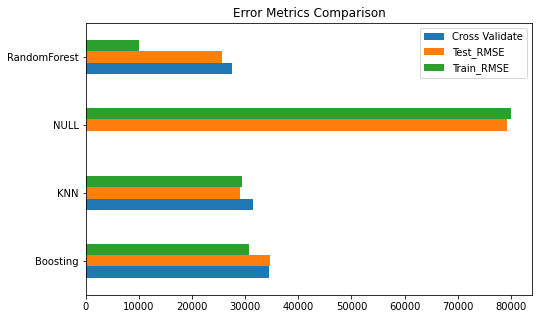

In [321]:
fig, ax = plt.subplots(figsize=(8,5))
error_metrics_rmse.T.plot(kind='barh', ax=ax)
ax.set_title('Error Metrics Comparison');

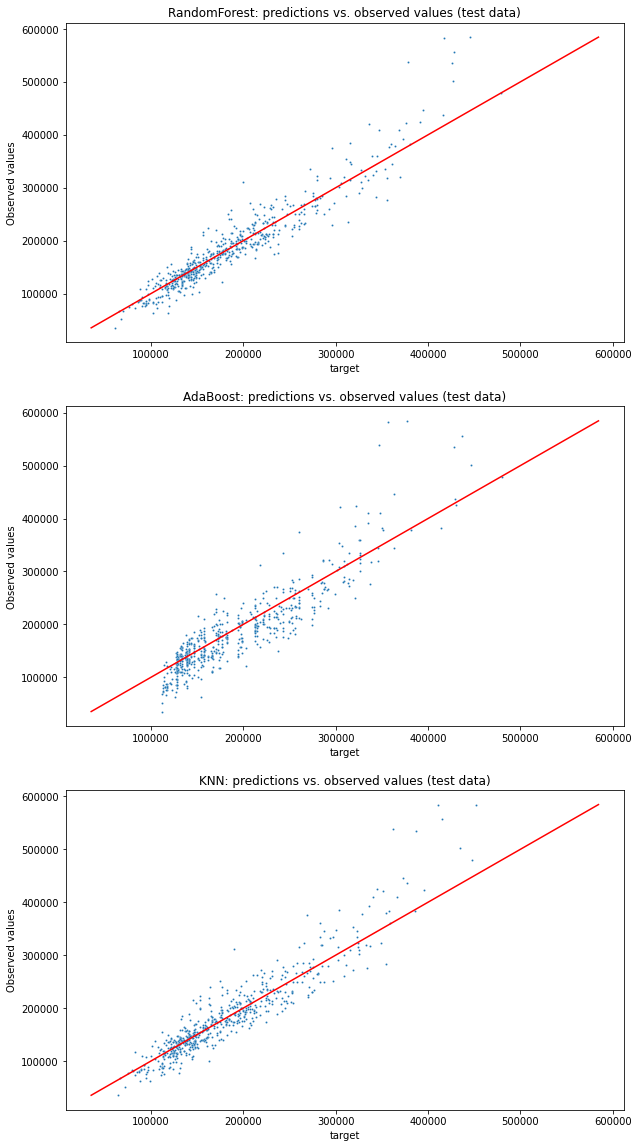

In [260]:

models=[('RandomForest',rf_gcv),('AdaBoost',boosting_gcv),('KNN',knn_gcv)]
fig, axes = plt.subplots(nrows=3, figsize=(10, 20))
for index, model in enumerate(models): 
    sns.scatterplot(x=model[1].predict(x_test), y=y_test, s=4, ax=axes[index])
    sns.lineplot(x=y_test, y=y_test, color='red',ax=axes[index])
    axes[index].set_title(f'{model[0]}: predictions vs. observed values (test data)')
    axes[index].set_ylabel('Observed values')

#### Feature Selection

Features with low variance or features that have a low correlation with target variable are not likely to have a meaningful influence on the model.

Therefore, there are chances that removing them can improve the model.

Additionally, two features that are correlated each other are not likely to have a meanigful impact on the model.  

Feature 01 & Feature 02,  Feature 04 & Feature 05 and feature06 & Feature 07 are higly correlated. (correlation is higher than 0.8).

Therefore, there are chances that removing one of the pairs that is lower correlated to target can improve the model.

Therefore, those features can be considered of removing can lead to less noise and better predictions.

Features with low variance

In [261]:
variances = pd.Series(df.var())
low_variances =variances[variances<0.1]
low_variances=list(low_variances.index)
low_variances

['feature18', '13_green', '13_pink', '13_red', '13_yellow']

Features that have a low correaltion with target

In [263]:
low_corr = df.corr(method='spearman').loc['target'].apply(np.abs).sort_values(ascending=False).index[20:]
low_corr = list(low_corr)
low_corr

['13_yellow', 'feature03', 'feature19', '13_pink', 'feature20']

Features to delete due to multi colinnearlity correlation

---'feature05','feature02','feature06','feature23' are selected to delete according to the correlation matrix that was previously shown and the reason explained above.

In [325]:
multicollinearlity=['feature05','feature02','feature06','feature23']

In [264]:

to_delete=multicollinearlity+low_corr+low_variances
df_selected = df.drop(columns=to_delete, inplace=False, axis=1)
x,y,x_train, x_test, y_train, y_test =data_split(df_selected)


In [267]:

rf_gcv2= GCV_Model(RandomForestRegressor,'RandomForest_FeatureSelection_1', rf_param_grid)
print(rf_gcv2)

Grid Search CV Best Parameters:  {'regressor__max_depth': 110, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 60, 'regressor__n_jobs': -1}
Grid Search CV Best Scores:  -27023.564414236753
Test RMSEs:  [27703.4397438  22944.1317564  26276.57929489 35612.21218839
 24654.65220135]
Average Test RMSE:  27438.20303696615
Average Test_R2:  0.8792642157241944
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': array([ 10,  60, 110, 160]),
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__n_estimators': array([ 10,  60, 110, 160, 210]),
                         'regressor__n_jobs': [-1]},
             scoring='neg_root_mean_squared_error')


Feature Selection (manual) above does not lead to improvement. 

This might be because too many features are deleted and some features that are still useful for prediction can be deleted under the selections.

Therefore, recursive feature elimination with scikit learn can be better to use for more precise selections with fewer deletion.

Only the lowest importance feature is removed this time to see if it will lead to improvement. 


### Recursive Feature Elimination

In [268]:
 x, y, x_train, x_test, y_train, y_test = data_split(df)


In [269]:
rfe = RandomForestRegressor(max_depth=160, max_features='sqrt', n_estimators=210, n_jobs=-1)


In [270]:
recursive_selector = RFE(estimator=rfe, n_features_to_select=23)

In [272]:
recursive_selector = recursive_selector.fit(x, y)

In [273]:
feature_names = df.iloc[:,1:].columns

In [275]:
low_importance = [x for x in df.columns if x in feature_names[~recursive_selector.support_]]
print(low_importance)


['13_pink']


In [276]:
to_delete=low_importance
df_selected = df.drop(columns=to_delete, inplace=False, axis=1)
x,y,x_train, x_test, y_train, y_test =data_split(df_selected)

rf_gcv2= GCV_Model(RandomForestRegressor,'RandomForest_FeatureSelection_2', rf_param_grid)

Grid Search CV Best Parameters:  {'regressor__max_depth': 110, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 210, 'regressor__n_jobs': -1}
Grid Search CV Best Scores:  -26791.700197780814
Test RMSEs:  [27883.37154954 23012.51693017 26281.72800511 34927.78145272
 23849.60729552]
Average Test RMSE:  27191.001046614234
Average Test_R2:  0.8816473065550345


A small improvement due to recusive feature elimination is identified. 

Improvement are not so large but it can be improved further if more appropriate features can be eliminated. 


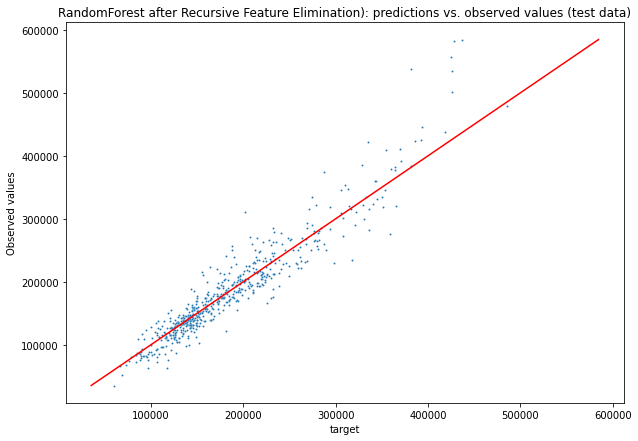

In [283]:

fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x=rf_gcv2.predict(x_test), y=y_test, s=4, ax=ax)
sns.lineplot(x=y_test, y=y_test, color='red',ax=ax)
ax.set_title('RandomForest after Recursive Feature Elimination): predictions vs. observed values (test data)')
ax.set_ylabel('Observed values');

In [309]:
error_metrics=error_metrics.rename(columns={'RandomForest_FeatureSelection_2':'RandomForest after Recursive Feature Elimination','RandomForest_FeatureSelection_1': 'RandomForest after Manual Feature Elimination'})
selected_error_metrics=error_metrics.loc[['Test_RMSE','Train_RMSE','Cross Validate'],['RandomForest','RandomForest after Recursive Feature Elimination']].head()
selected_error_metrics

,RandomForest,RandomForest after Recursive Feature Elimination
Test_RMSE,25700.556351,25734.679473
Train_RMSE,10088.078068,9764.168179
Cross Validate,27474.081387,27191.001047


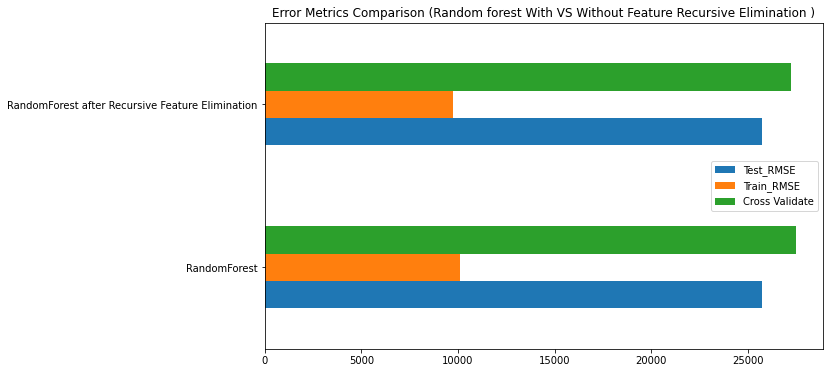

In [310]:
fig, ax = plt.subplots(figsize=(10,6))
selected_error_metrics.T.plot(kind='barh', ax=ax)
ax.set_title('Error Metrics Comparison (Random forest With VS Without Feature Recursive Elimination )');